# Extra plots for thesis document and presentation

This notebook is used to create extra plots for the thesis. This notebook is not important for the logic of the drought analysation or model calibration.

### 1. Importing general python modules

In [2]:
# general python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from datetime import datetime, timedelta

# niceties
from rich import print

### 2. Loading data

In [3]:
# load data for Blois catchment
basin_name = "FR003882"
q_data = pd.read_csv("FR003882_streamflow_m3s.csv", index_col='date', parse_dates=True)["FR003882"]
q_data_9019 = q_data['1997-01-01':'2019-12-31']

### 3. Plot discharge January vs. August

In [4]:
# get the monthly mean values
Q_mean_month = q_data.groupby(pd.PeriodIndex(q_data.index, freq="M")).mean()

# get the values for January and August
Q_jan = pd.Series(Q_mean_month[Q_mean_month.index.month == 1], name='January')
Q_aug = pd.Series(Q_mean_month[Q_mean_month.index.month == 8], name='August')

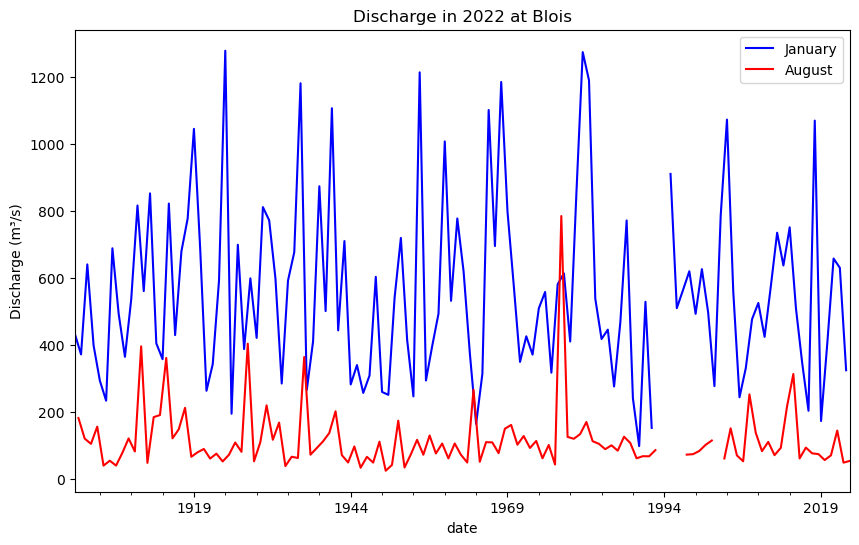

In [5]:
# plot the results
plt.figure(figsize=(10, 6))
Q_jan.plot(label="January", color='blue')
Q_aug.plot(label="August", color='red')
plt.title('Discharge in 2022 at Blois')
plt.ylabel('Discharge (m³/s)')

# zoom in on single drought
#q_data_2022.plot(label="Discharge")
#plt.xlim(['2022-07-20', '2022-11-01'])
#plt.ylim([20, 100])
#plt.axhline(y = 50, color = 'black', linestyle = '-')

# plot
plt.legend()
plt.show()

### 4. Load drought analyser
Go to Drought_analyser.ipynb to see the code. This function is placed in a separate file so it is easy to use in other files, without copying the whole code.

In [6]:
%run Drought_analyser.ipynb

### 5. Extra plots for presentation

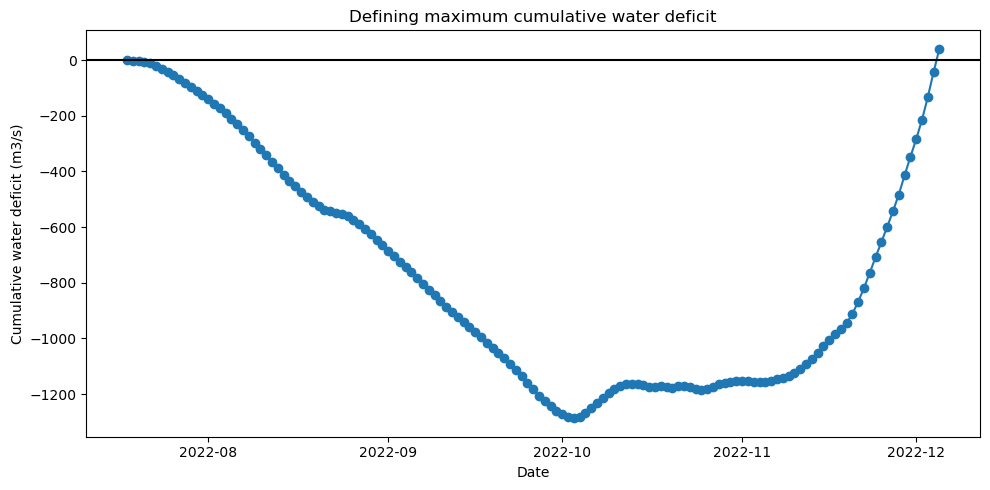

In [10]:
drought_df = drought_analyser(q_data, basin_name, 66.5)

# find the drought
cum_def = drought_df['Cum Deficit List'].iloc[102]
start_date = drought_df['Start Date'].iloc[102]
duration = drought_df['Duration (days)'].iloc[102]
date_list = [start_date + timedelta(days=i) for i in range(duration)]

# plot the graph
plt.figure(figsize=(10, 5))
plt.plot(date_list, cum_def, marker='o')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.title("Defining maximum cumulative water deficit")
plt.xlabel("Date")
plt.ylabel("Cumulative water deficit (m3/s)")
#plt.xticks(rotation=45)  # Rotate dates for readability
plt.tight_layout()
plt.show()

### 6. Extra plot and table for report

In [11]:
q_data_4222 = q_data['1942-01-01':'2022-12-21']
droughts = drought_analyser(q_data_4222, "", 66.5)
droughts = droughts.set_index("Start Date")
droughts = droughts.drop(columns=["Cum Deficit List"])
droughts.index = pd.to_datetime(droughts.index, errors='coerce')

# Filteren op data na 1975
droughts_after_1975 = droughts[droughts.index >= '1975-01-01']

In [12]:
droughts_after_1975.sort_values("Max Cumulative Deficit (m3/s)")[:5]

,Drought Number,Duration (days),Max Cumulative Deficit (m3/s)
Start Date,,,
1976-06-22,33,96,-1324.1
2022-07-18,75,141,-1286.5
2006-07-15,56,74,-1108.4
2019-07-03,69,118,-577.8
2011-09-22,63,49,-414.6


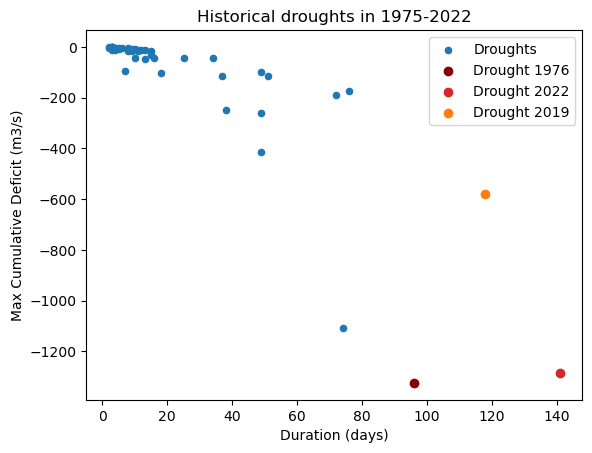

In [13]:
ax = droughts_after_1975.plot(x="Duration (days)", y="Max Cumulative Deficit (m3/s)", kind="scatter", label="Droughts")


# get first drought point
plt.scatter(96, -1324.1, color="darkred", label='Drought 1976')
plt.scatter(141, -1286.5, color="#d62728", label='Drought 2022')
plt.scatter(118, -577.8, color="#ff7f0e", label='Drought 2019')

# Extract x and y values
x = droughts_after_1975["Duration (days)"]
y = droughts_after_1975["Max Cumulative Deficit (m3/s)"]

# Fit a quadratic function (parabola)
coeffs = np.polyfit(x, y, 2)  # 2nd-degree polynomial (quadratic)
poly_func = np.poly1d(coeffs)  # Convert to polynomial function

# Generate smooth x values for the curve
x_smooth = np.linspace(x.min(), x.max(), 100)
y_smooth = poly_func(x_smooth)

# Plot the fitted curve
#plt.plot(x_smooth, y_smooth, color="black", label="Quadratic Fit", linewidth=1)

# Show legend
plt.title("Historical droughts in 1975-2022")
plt.legend()
plt.show()